<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Защитим данные клиентов страховой компании «Хоть потоп», чтобы при преобразовании качество моделей машинного обучения не ухудшилось.Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и  обоснуем корректность его работы.

## Загрузка и подготовка данных

Откроем файл с данными, изучим общую информацию и подготовим данные.

Набор данных находится в файле: 
- /datasets/insurance.csv



Таким образом, исследование пройдёт в четыре этапа:

- Загрузка и подготовка данных.
- Умножение матрицы.
- Алгоритм преобразования.
- Проверка алгоритма.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from numpy import linalg as LA
from numpy.linalg import inv

In [2]:
# чтение файла с данными и сохранение 
data = pd.read_csv('/datasets/insurance.csv')

**Описание данных**:

**Признаки:**

- пол
- возраст 
- зарплата застрахованного
- количество членов его семьи.

**Целевой признак:**

- количество страховых выплат клиенту за последние 5 лет.

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
#поиск дубликатов
data.duplicated().sum() 

153

In [7]:
# удалим 153 дубликата
data  = data.drop_duplicates().reset_index(drop = True) 

In [8]:
#приведем всё к нижнему регистру
data.columns = data.columns.str.lower()

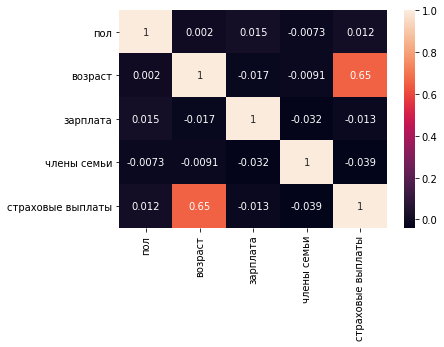

In [9]:
ax = plt.axes()
sns.heatmap(data.corr(), annot = True)
plt.show()

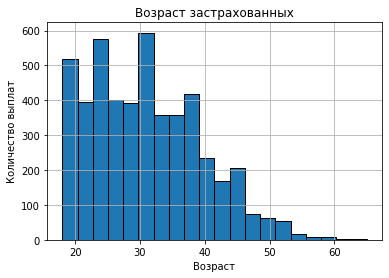

In [10]:
data['возраст'].hist(bins=20,range=(18,65),edgecolor='black')
plt.title('Возраст застрахованных')
plt.xlabel('Возраст')
plt.ylabel('Количество выплат')
plt.show()

**Вывод:**

- Файл содержал 5000 строк и 5 столбцов
- 153 дубликата, которые удалили
- Высокая корреляция между возрастом и страховыми выплатами

## Умножение матриц

In [11]:
features = data.drop('страховые выплаты', axis=1)
target = data['страховые выплаты']

In [12]:
print(features.shape,target.shape)

(4847, 4) (4847,)


Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения::

$$
w = (X^T X)^{-1} X^T y
$$

**Алгоритм**:

In [13]:
'''Объявляем модель'''
model = LinearRegression()
'''Обучаем модель'''
model.fit(features, target)
'''Посмотрим на результат обучения'''
model.coef_

array([ 9.46018141e-03,  3.61640081e-02, -1.38991363e-07, -1.42517371e-02])

In [14]:
'''Оценка свободного коэффициента'''
model.intercept_

-0.9517099946520766

In [15]:
'''Создадим массив с единицами'''
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
'''Вектор целевого признака'''
y = target
'''Подставим данные в формулу и преобразуем'''
w = np.linalg.inv(X.T @ X) @ X.T @ y # @ - оператор numpy для матричного умножения
'''И Матрица w со значениями intercept и coef для моей матрицы X выглядит следующим образом'''
print(w[1:])
print(w[0])

[ 9.46018141e-03  3.61640081e-02 -1.38991363e-07 -1.42517371e-02]
-0.95170999465196


**Вывод:**
- Коэффициенты совпадают на 100 %. Матричная форма очень полезна и значительно упрощает вычисления.При умножении признаков на обратную матрицу качество линейной регресии не меняется.

**Обоснование:**

Представим новую матрицу признаков $X_1$ как произведение старой $X$ на матрицу $P$(обратимую):
$$
X_1 = XP
$$
Подставим новое значение $X_1$ в формулу $w_1$:
$$
w_1 = ((XP)^T XP)^{-1} (XP)^T y
$$
Раскроем первое произведение $(XP)^T$:
$$
w_1 = (P^T X^T XP)^{-1} P^T X^T y
$$
Перегруппируем множители в скобках, чтобы это выглядело как произведение трех множителей:
$$
w_1 = (P^T (X^T X)P)^{-1} P^T X^T y
$$
Раскроем скобки:
$$
w_1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
Так как $P$ по условию обратимая, то произведение $(P^T)^{-1} P^T$ равно $E$ (единичная матрица):
$$
w_1 = P^{-1} (X^T X)^{-1} EX^T y = P^{-1} (X^T X)^{-1} X^T y
$$
Можно заметить, что справа получилась формула для $w$ :
$$
w_1 = P^{-1} (X^T X)^{-1} X^T y = P^{-1}w
$$
Подставим новое значение весов $w_1$  в формулу для предсказаний линейной регрессии. Предсказания модели расчитываются по формуле:
$$
a = Xw
$$
Подставим в эту формулу значения $X_1$ и $w_1$  для того, чтобы на их основе вычислить предсказания модели $a_1$:
$$
a_1 = X_1w_1 = XPP^{-1}w
$$
Так как $P$  по условию обратимая, то произведение $PP^{-1}$ снова равно $E$:
$$
a_1 = XPP^{-1}w = XEw = Xw = a
$$
Мы доказали, что предсказания $a_1$ для матрицы признаков, умноженных на обратимую матрицу $P$ равны предсказаниям $a$. Следовательно, качество линейной регрессии при умножении признаков на обратимую матрицу не изменилось. В данном случае, параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w_1$ связаны следующим образом:
$$
w_1 = P^{-1}w
$$

## Алгоритм преобразования

Найдем метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию для защиты данных клиентов страховой компании «Хоть потоп»

In [16]:
'''Разделим данные на обучающую и тестовую выборки  в соотношении 75:25'''
df_train, df_test= train_test_split(data, test_size=0.25, random_state=12345)

In [17]:
'''Создадим переменные для признаков и целевого признака и запишем в них код'''
features_train = df_train.drop(['страховые выплаты'], axis=1)
target_train = df_train['страховые выплаты']
features_test = df_test.drop(['страховые выплаты'], axis=1)
target_test = df_test['страховые выплаты']

In [18]:
print('Признаки обучающей выборки:',features_train.shape,  
      'Целевой признак обучающей выборки:', target_train.shape,
      'Признаки тестовой выборки:',features_test .shape,
      'Целевой признак тестовой выборки:',target_test.shape)


Признаки обучающей выборки: (3635, 4) Целевой признак обучающей выборки: (3635,) Признаки тестовой выборки: (1212, 4) Целевой признак тестовой выборки: (1212,)


- Обучающая модель   - 75 % обучения модели
- Тестовая модель  - 25 % 

**Алгоритм**: Для преобразования данных, чтобы по ним было сложно восстановить персональную информацию для защиты данных клиентов страховой компании «Хоть потоп» выберем матрицу со случайными величинами, у которой существует обратная к ней матрица.
Обратная матрица — такая матрица $A^{-1}$, при умножении которой на исходную матрицу $A$ получается единичная матрица $E$:

$A^{-1}A = AA^{-1} = E$


**Обоснование**:

Исходная матрица должна иметь необходимую размерность n*n, где n - количество признаков для регрессии. Таким образом обратная матрица будет иметь туже размерность, что и исходная матрица .Обратная матрица  существует только для квадратных невырожденных матриц (определитель которых не равен нулю).

In [19]:
'''Создадим матрицы.'''
features_train_matrix = features_train.values
features_test_matrix = features_test.values

In [20]:
'''Создадим рандомную обратимую матрицу.'''
random_matrix = np.random.randn(4, 4)
random_matrix

array([[-1.83669094,  1.05634027, -0.8171725 , -0.67986118],
       [ 0.70247094, -0.35582039, -0.9022445 , -2.15553585],
       [-1.26163976, -0.84134843, -0.19188231,  0.02143523],
       [-0.51542965, -0.600834  , -0.95143427, -1.47817745]])

In [21]:
'''Проверим матрицу на обратимость,умножив её на обратную ей матрицу.
Для получения обратной матрицы будем использовать функцию inv():'''
np.round(random_matrix @ np.linalg.inv(random_matrix))

array([[ 1., -0.,  0.,  0.],
       [ 0.,  1., -0.,  0.],
       [ 0., -0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

Единичной матрицей $E$ называется диагональная матрица, у которой на главной диагонали все элементы равны единице, а остальные элементы равны нулю.Матрица является единичной, значит рандомная матрица обратима.

In [22]:
'''Перемножим тренировочную и тестовую матрицы на получившуюся рандомную обратимую матрицу:'''
features_train_random = features_train_matrix.dot(random_matrix)
features_test_random = features_test_matrix.dot(random_matrix)

In [23]:
'''Проверим'''
features_train_random_matrix = features_train_random.dot(np.linalg.inv(random_matrix))
features_train_new = pd.DataFrame(features_train_random_matrix, columns=features_train.columns)
features_train_new = np.round(features_train_new)

In [24]:
features_train_new.describe()

,пол,возраст,зарплата,члены семьи
count,3635.000000,3635.000000,3635.000000,3635.000000
mean,0.492435,31.022834,39885.447043,1.212380
std,0.500012,8.516149,9996.543984,1.095099
min,0.000000,18.000000,7400.000000,0.000000
25%,0.000000,24.000000,33000.000000,0.000000
50%,0.000000,30.000000,40100.000000,1.000000
75%,1.000000,37.000000,46700.000000,2.000000
max,1.000000,65.000000,74800.000000,6.000000


In [25]:
features_train.describe()

,пол,возраст,зарплата,члены семьи
count,3635.000000,3635.000000,3635.000000,3635.000000
mean,0.492435,31.022834,39885.447043,1.212380
std,0.500012,8.516149,9996.543984,1.095099
min,0.000000,18.000000,7400.000000,0.000000
25%,0.000000,24.000000,33000.000000,0.000000
50%,0.000000,30.000000,40100.000000,1.000000
75%,1.000000,37.000000,46700.000000,2.000000
max,1.000000,65.000000,74800.000000,6.000000


**Вывод:**
- Данные совпадают на 100 %. В качестве метода преобразования данных, чтобы по ним было сложно восстановить персональную информацию для защиты данных клиентов страховой компании «Хоть потоп» применили обратную матрицу.

**Шаги:**
- Создание исходной матрицы
- Получение рандомной обратной матрицы
- Сранение исходной матрицы и рандомной обратной матрицы


## Проверка алгоритма

Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

In [26]:
model = LinearRegression()
model.fit(features_train_matrix, target_train)
r2_matrix = r2_score(target_test, model.predict(features_test))

In [27]:
model = LinearRegression()
model.fit(features_train_random, target_train)
r2_random = r2_score(target_test, model.predict(features_test_random))

In [28]:
print('R2 матрицы:          ', r2_matrix)
print('R2 обратной матрицы: ', r2_random)

R2 матрицы:           0.42307727492147584
R2 обратной матрицы:  0.42307727492194713


**Вывод:**

Мы проверили качества моделей Линейной регрессии с помощью метрики R2 на данных - сначала на исходных, затем умноженных на обратимую матрицу. Показатели метрики совпали. Можно сделать вывод, что алгоритм работает.

**Общий вывод:**

- Загружены и изучены данные.
- Матричная форма очень полезна и значительно упрощает вычисления.При умножении признаков на обратную матрицу качество линейной регресии не изменилось.
- Для преобразования данных, чтобы по ним было сложно восстановить персональную информацию для защиты данных клиентов страховой компании «Хоть потоп» выбрана матрица со случайными величинами, у которой существует обратная к ней матрица. 
- Проверили качества моделей Линейной регрессии с помощью метрики R2 на данных.
